In [1]:
from fastai.vision.all import *
import numpy as np
import matplotlib.pyplot as plt
from util.utils import rmse_loss

### Get the test data

In [2]:
path = Path('.')
Path.BASE_PATH = path

In [3]:
test_data = L(get_image_files(path/'data/mnist_png/testing'))

In [4]:
test_data

(#10000) [Path('data/mnist_png/testing/8/1389.png'),Path('data/mnist_png/testing/8/3012.png'),Path('data/mnist_png/testing/8/3389.png'),Path('data/mnist_png/testing/8/2142.png'),Path('data/mnist_png/testing/8/290.png'),Path('data/mnist_png/testing/8/5011.png'),Path('data/mnist_png/testing/8/4380.png'),Path('data/mnist_png/testing/8/4497.png'),Path('data/mnist_png/testing/8/465.png'),Path('data/mnist_png/testing/8/7378.png')...]

In [5]:
Image.open(test_data[0])

### Load the learner

In [6]:
inf_learner = load_learner(path/'export.pkl')

### Get predictions on test data

In [7]:
test_dataloaders = inf_learner.dls.test_dl(test_data)

In [8]:
preds, _ = inf_learner.get_preds(dl=test_dataloaders)

In [9]:
preds.shape

torch.Size([10000, 1, 28, 28])

<AxesSubplot:>

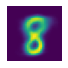

In [10]:
show_image(preds[0])

### Reconstrcuting Images

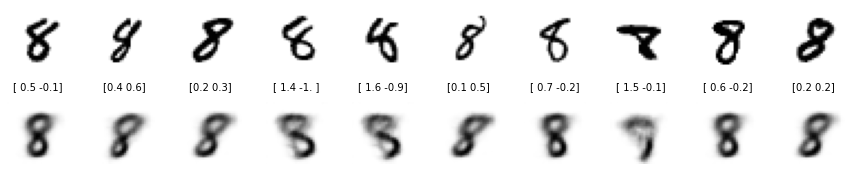

In [15]:
n_to_show = 10
batch = test_dataloaders.one_batch()[0]
z_points = inf_learner.model.encoder(batch[:n_to_show])
reconstructed = inf_learner.model.decoder(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

with torch.no_grad():
    for i in range(n_to_show):
        img = batch[i].squeeze()
        ax = fig.add_subplot(2, n_to_show, i+1)
        ax.axis('off')
        ax.text(0.5, -0.35, str(np.round(tuple(z_points[i]),1)), fontsize=10, ha='center', transform=ax.transAxes)   
        ax.imshow(img, cmap='gray_r')

    for i in range(n_to_show):
        img = reconstructed[i].squeeze()
        ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
        ax.axis('off')
        ax.imshow(img, cmap='gray_r')